# Bayesian Network Model<br>
**Thomas Cholak**

First we download our relevant data set into the Google Colab (Jupyter) notebook.<br>
After downloading, we can comment this section of code out):

In [ ]:
from google.colab import files

uploaded = files.upload()

Used the Following Sources for data scraping/collection (Bibliography):

Menjivar, J. (2020, January 12). Ghastly warnings. Creepypasta. https://www.creepypasta.com/ghastly-warnings/

Rashell, N. (2019, June 23). Tales from an ex-convict. Creepypasta. https://www.creepypasta.com/tales-from-an-ex-convict/

Müller, A. C., & Guido, S. (2018). Introduction to machine learning with python: A guide for data scientists. O’Reilly Media.<br>


These are the data sets I created after using the above sources -><br>
CS-Data (891 lines total):
https://drive.google.com/file/d/1D990lrh940Y1Ql9-sTiQRP6WnkkHikg2/view?usp=sharing

Non CS-Data (358 lines total):
https://drive.google.com/file/d/1fgFEcyyU3NwFZYGZx50is7IYFJ7sTF1e/view?usp=sharing

(1249 lines total using both datasets)

Next we need to import pandas dataframes and numpy plus a seed to make sure all runs are the same.

Data Set Head (First 5 lines after data shuffling):

╒════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │   CLASS │ TEXT                                                                                                                                                           │
╞════╪═════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │       1 │ Recall that because average precision is the area under a curve that goes from 0 to 1, average precision always returnsa value between 0 (worst) and 1 (best). │
├────┼─────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  1 │       0 │ Anyway, after about twenty minutes of br

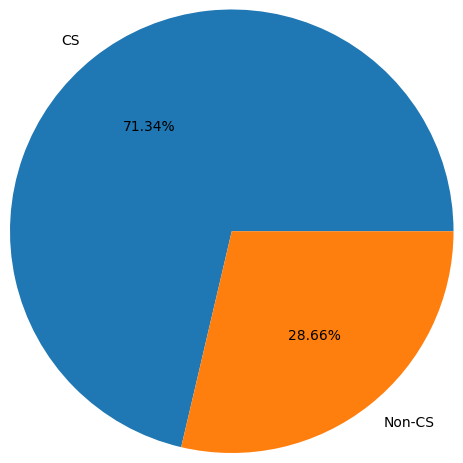

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter  # used for word counting

np.random.seed(42)  # set seed so every run is the same

# read in our data
CS_DataSet = 'CS_Data.txt'
Non_CS_DataSet = 'NonCS_Data.txt'

# open CS related data
with open(CS_DataSet, 'r') as file:
    file_content = file.read()

lines = file_content.split('\n')
CS_Data_Pre = pd.DataFrame(lines)

# open non-CS related data
with open(Non_CS_DataSet, 'r') as file:
    file_content_2 = file.read()

lines_2 = file_content_2.split('\n')
NonCS_Data_Pre = pd.DataFrame(lines_2)

# 'CS' represented as integer '1' -> we add as leftmost column
add_column = pd.DataFrame([1] * len(CS_Data_Pre),
                          index=CS_Data_Pre.index)

# 'Non-CS' represented as integer '0' -> leftmost column
add_column_2 = pd.DataFrame([0] * len(NonCS_Data_Pre),
                          index=NonCS_Data_Pre.index)

CS_Data = pd.concat([add_column, CS_Data_Pre], axis=1)
NonCS_Data = pd.concat([add_column_2, NonCS_Data_Pre], axis=1)

# then we combine both datasets
both_data = pd.concat([CS_Data, NonCS_Data])
SpamHam = both_data.sample(frac=1).reset_index(drop=True)
SpamHam.columns = ['CLASS', 'TEXT']

print("Data Set Head (First 5 lines after data shuffling):\n")
print(tabulate(SpamHam.head(), headers='keys', tablefmt='fancy_grid'), "\n")

plt.pie(SpamHam['CLASS'].value_counts(), radius = 1.5, autopct="%0.2f%%",
        labels=['CS','Non-CS'])
plt.show()

Output Model Accuracy
We are using '1' to signifiy CS keywords are present and '0' to signify there are none present.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB  # used to actually define Naive Bayes model

# we prepare the data by using 'the classification' and the 'text' of the model
X = SpamHam['TEXT']
y = SpamHam['CLASS']

# feature extraction into vectors
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(X)

# perform the model training (test data size = 20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2,
                                                    random_state=78)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# here we evaluate our model
y_pred = naive_bayes_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# here we perform our actual predictions
text = ["Classify this text"]
text_tfidf = tfidf_vector.transform(text)
predicted_class = naive_bayes_classifier.predict(text_tfidf)
print("Predicted class:", predicted_class)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# find and print the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        66
           1       0.94      1.00      0.97       184

    accuracy                           0.96       250
   macro avg       0.97      0.92      0.94       250
weighted avg       0.96      0.96      0.95       250

Predicted class: [1]

Confusion Matrix:
 [[ 55  11]
 [  0 184]]

Model accuracy: 0.956


Total Word Count for both CS and non-CS<br>
Total Number of Keywords is '21'

In [ ]:
from collections import Counter
import re

# creates 21 keywords
keywords = ["training", "machine", "number", "parameter", "cross-validation",
            "clustering", "clusters", "classification", "dataset", "parameters",
            "cluster", "feature", "learning", "points", "different", "positive",
            "algorithms", "model", "data", "algorithm", "accuracy"]

# open CS related data
with open(CS_DataSet, 'r') as file:
    text = file.read()

sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

# removes '\n' characters and filter out empty sentences
sentences = [sentence.replace('\n', '') for sentence in sentences if sentence.strip()]
data = np.array(sentences)  # convert into a numpy array

words_list = np.concatenate([sentence.split() for sentence in data])

# used a for-loop to count occurences in np.array using keywords array
keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = np.sum(words_list == keyword)

# table for CS-related data
table_1 = []
for keyword, count in keyword_counts.items():
    table_1.append([count])

# open non-CS related data
with open(Non_CS_DataSet, 'r') as file:
    text_2 = file.read()

# uses regex to break sentences into individual words
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text_2)
sentences = [sentence.replace('\n', '') for sentence in sentences if sentence.strip()]

data = np.array(sentences)
words_list = np.concatenate([sentence.split() for sentence in data])

keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = np.sum(words_list == keyword)

# table for non-CS data
table_2 = []
for keyword, count in keyword_counts.items():
    table_2.append([count])

table_data = list(zip(keywords, table_1, table_2))

print(tabulate(table_data, headers=["Keyword", "Word Count (CS)", "Word Count (Non-CS)"],
               tablefmt="fancy_grid"))

╒══════════════════╤═══════════════════╤═══════════════════════╕
│ Keyword          │ Word Count (CS)   │ Word Count (Non-CS)   │
╞══════════════════╪═══════════════════╪═══════════════════════╡
│ training         │ [60]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ machine          │ [62]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ number           │ [45]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ parameter        │ [40]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ cross-validation │ [39]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ clustering       │ [34]              │ [0]                   │
├──────────────────┼───────────────────┼───────────────────────┤
│ clusters         │ [34]

This outputs statistics on the data -> <br>
Total number of Lines in Data Set: 1249<br>
Shortest Text has 22 characters and the Longest Text has 428.<br>
Rest of Statistics (std, mean, and corresponding quartiles) are produced below:

In [ ]:
SpamHam['characters'] = SpamHam['TEXT'].apply(len)
SpamHam['characters'].describe()  # outputs numbers of characters

count    1249.000000
mean      127.144916
std        54.855571
min        22.000000
25%        87.000000
50%       120.000000
75%       160.000000
max       428.000000
Name: characters, dtype: float64